In [ ]:
# 초기데이터 Load
#구글 드라이브 연동
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #seaborn 불러오기

from google.colab import drive



# 모든 코드에서 사용할 조건
HORROR_MV = 'Horror'


In [ ]:

# 데이터 불러오기
# 폴더이름 datathon

drive.mount('/content/drive')
root_path = '/content/drive/MyDrive/datathon/'
netflix_df = pd.read_csv(root_path +'netflix_titles.csv')
disney_df = pd.read_csv(root_path +'disney_plus_titles.csv')
amazon_df = pd.read_csv(root_path +'amazon_prime_titles.csv')


# 데이터 크기 확인
print("넷플릭스 데이터 크기:", netflix_df.shape)
print("디즈니+ 데이터 크기:", disney_df.shape)
print("아마존 데이터 크기:", amazon_df.shape)

# 샘플 데이터 확인
print(netflix_df.head())
print(disney_df.head())
print(amazon_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
넷플릭스 데이터 크기: (8807, 12)
디즈니+ 데이터 크기: (1450, 12)
아마존 데이터 크기: (9668, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   



In [ ]:
# 각 데이터셋의 컬럼 확인
print("Netflix 컬럼:", netflix_df.columns)
print("Disney+ 컬럼:", disney_df.columns)
print("Amazon Prime 컬럼:", amazon_df.columns)

Netflix 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Disney+ 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Amazon Prime 컬럼: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# 컬럼별 결측치 확인

print(f"Netflix : \n{netflix_df.isnull().sum()}")
print("-" * 30)
print(f"Amazon : \n{amazon_df.isnull().sum()}")
print("-" * 30)
print(f"Disney : \n{disney_df.isnull().sum()}")


Netflix : 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
------------------------------
Amazon : 
show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
Disney : 
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


In [ ]:
# date_added 가 null 인 갯수를 확인해서 왜! Netflix 의 데이터만 이용하는지 작성
# 데이터 전처리: 'date_added' 열을 datetime 객체로 변환
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), errors='coerce')
disney_df['date_added'] = pd.to_datetime(disney_df['date_added'].str.strip(), errors='coerce')
amazon_df['date_added'] = pd.to_datetime(amazon_df['date_added'].str.strip(), errors='coerce')

# 변환 결과 확인
print(netflix_df[['date_added']].head())
print(disney_df[['date_added']].head())
print(amazon_df[['date_added']].head())

# 변환 실패한 데이터 확인 (NaT 값 필터링)
print("넷플릭스 NaT 개수:", netflix_df['date_added'].isna().sum())
print("디즈니+ NaT 개수:", disney_df['date_added'].isna().sum())
print("아마존 NaT 개수:", amazon_df['date_added'].isna().sum())

# 아마존은 Nat 개수가 너무 많아서 계절 정보를 관계지어서 확인이 불가능 하다는 결론


  date_added
0 2021-09-25
1 2021-09-24
2 2021-09-24
3 2021-09-24
4 2021-09-24
  date_added
0 2021-11-26
1 2021-11-26
2 2021-11-26
3 2021-11-26
4 2021-11-25
  date_added
0 2021-03-30
1 2021-03-30
2 2021-03-30
3 2021-03-30
4 2021-03-30
넷플릭스 NaT 개수: 10
디즈니+ NaT 개수: 3
아마존 NaT 개수: 9513


# 아마존의 Nat 로 인해 데이터 사용 불가 확인
위에 출력된 결과 데이터
넷플릭스 NaT 개수: 10
디즈니+ NaT 개수: 3
아마존 NaT 개수: 9513

9513개의 결혼치를 확인함

In [ ]:
# 전처리 Season 을 위한 함수
# 계절 매핑 함수
def get_season(month):
    if month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'Spring'

def filter(df, condition):
    df = df[df['listed_in'].str.contains(condition, case=False, na=False)]
    df = df[df['release_year'] >= 2015]
    return df

# Preprocessing - 전처리
# year_added
# season
# rating
def preprocess(df, condition):
    df = filter(df, condition)
    # 'date_added' 컬럼 날짜 변환
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    # 'year_added' 컬럼 추가 (date_added에서 연도 추출)
    df['year_added'] = df['date_added'].dt.year

    # 'month_added' 컬럼 추가 (date_added에서 월 추출)
    df['month_added'] = df['date_added'].dt.month

    # 계절 컬럼 추가
    df['season'] = df['date_added'].dt.month.apply(lambda x: get_season(x) if pd.notnull(x) else 'Unknown')
    print("finished preprocess")
    return df

# 공포물을 정의할때 Horror 장르로 필터링
#
# 전체 Horror는 Horror|Thriller 를 기준으로 합니다.
# print(disney_df[['date_added']].head())
# print(amazon_df[['date_added']].head())

horror_disney_df = preprocess(disney_df, HORROR_MV)
horror_amazon_df = preprocess(amazon_df, HORROR_MV)
horror_netflix_df = preprocess(netflix_df, HORROR_MV)

# 필터링 넷플릭스 데이터상의 결손치 확인
print(f"Netflix : \n{horror_netflix_df.isnull().sum()}")

# # Season 정보는 유일하게 date_added 에서만 가져오고 또다른 season을 파악할 필요 없습니다.


# horror_netflix_df = preprocess(horror_netflix_df)
# horror_disney_df = preprocess(horror_disney_df)
# horror_amazon_df = preprocess(horror_amazon_df)

# # 각 플랫폼의 공포영화 필터링 데이터수를 확인
# print("Disney+ 공포영화 필터링 데이터수:", len(horror_disney_df))
# print("아마존 공포영화 필터링 데이터수:", len(horror_amazon_df)

print("Netflix 공포영화 필터링 데이터수:", len(horror_netflix_df))



finished preprocess
finished preprocess
finished preprocess
Netflix : 
show_id          0
type             0
title            0
director        63
cast             6
country         18
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added       0
month_added      0
season           0
dtype: int64
Netflix 공포영화 필터링 데이터수: 303


Amazon Prime 은 date_added column 의 결손치가 많아서 사용 불가
- Season정보로 변환이 불가능합니다.

Disney + 공포영화 장르에 속하는 데이터가 부족합니다.
- 비교 불가

따라서 Netflix 데이터 기준으로 데이터 분석을 시작합니다.

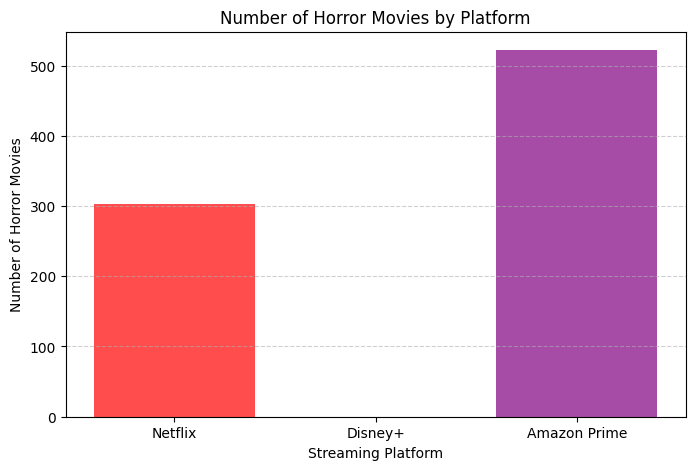

{'Netflix': 303, 'Disney+': 0, 'Amazon Prime': 522}

In [ ]:
# 아마존은 위에서 Date_added 컬럼에 대한 결측치가 높아서 사용불가
# Disney+ 공포영화 필터링된 데이터가 너무 적어서 사용 불가
# 따라서 Netflix 기준으로 분석을 진행할 예정입니다.



# 공포영화 개수 저장
horror_counts = {
    "Netflix": horror_netflix_df.shape[0],
    "Disney+": horror_disney_df.shape[0],
    "Amazon Prime": horror_amazon_df.shape[0]
}

# 시각화
plt.figure(figsize=(8,5))
plt.bar(horror_counts.keys(), horror_counts.values(), color=['red', 'blue', 'purple'], alpha=0.7)
plt.xlabel("Streaming Platform")
plt.ylabel("Number of Horror Movies")
plt.title("Number of Horror Movies by Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 각 플랫폼별 공포영화 개수 출력
horror_counts

season
Fall      71
Spring    73
Summer    82
Winter    77
dtype: int64


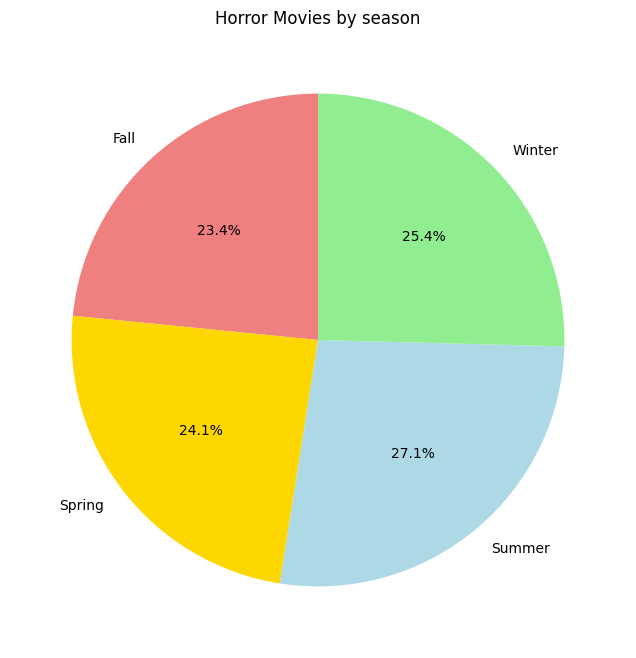

In [ ]:
def analyze_horror_movies(df):

    # 1. 계절별 공포영화 확인 (전체 년도)
    seasonal_horror = df.groupby('season').size()
    print(seasonal_horror)

    plt.figure(figsize=(8, 8))
    seasonal_horror.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold', 'lightblue', 'lightgreen'])
    plt.title('Horror Movies by season')
    plt.ylabel('')  # y축 라벨 제거
    plt.show()

analyze_horror_movies(horror_netflix_df)

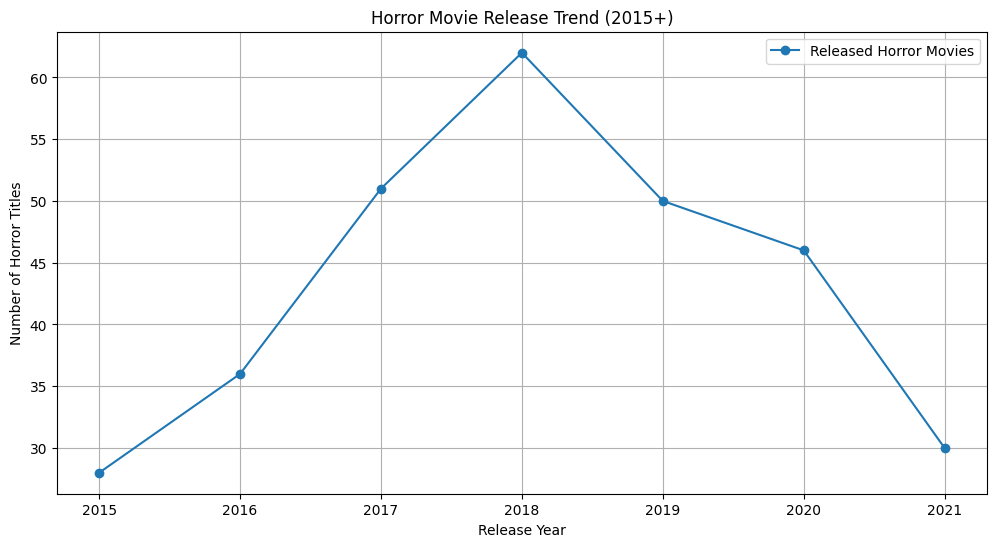

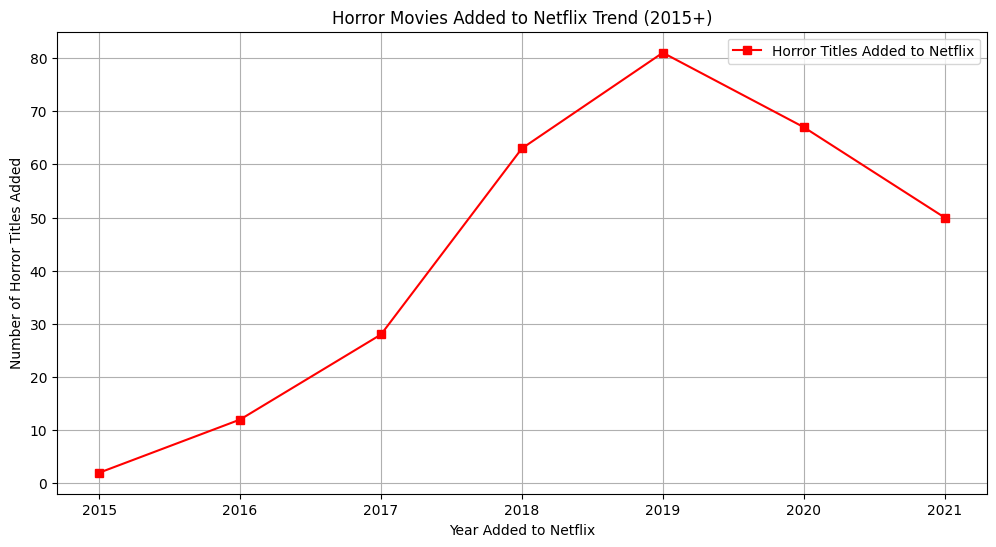

      Release Year Count  Netflix Added Count
2015                  28                    2
2016                  36                   12
2017                  51                   28
2018                  62                   63
2019                  50                   81
2020                  46                   67
2021                  30                   50


In [ ]:
# 년도별 공포영화 개수
# 2015년 이후 출시작 수 변화 확인 (filtering)
horror_2015s = horror_netflix_df[horror_netflix_df['release_year'] >= 2015]

release_trend = horror_2015s['release_year'].value_counts().sort_index()

# 넷플릭스 추가 날짜 기준 변화 확인
added_trend = horror_2015s['date_added'].dt.year.value_counts().sort_index()

# 시각화 - 출시 연도별 공포영화 수
plt.figure(figsize=(12, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', linestyle='-', label="Released Horror Movies")
plt.xlabel("Release Year")
plt.ylabel("Number of Horror Titles")
plt.title("Horror Movie Release Trend (2015+)")
plt.legend()
plt.grid(True)
plt.show()

# 시각화 - 넷플릭스 추가 연도별 공포영화 수
plt.figure(figsize=(12, 6))
plt.plot(added_trend.index, added_trend.values, marker='s', linestyle='-', color='r', label="Horror Titles Added to Netflix")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Horror Titles Added")
plt.title("Horror Movies Added to Netflix Trend (2015+)")
plt.legend()
plt.grid(True)
plt.show()

# 데이터프레임 확인
trend_comparison = pd.DataFrame({
    "Release Year Count": release_trend,
    "Netflix Added Count": added_trend
}).fillna(0)

print(trend_comparison)



컨텐츠 추가일 (date_added)기준으로 2015년 이전의 데이터가 없거나 적기에 비교대상에서 제외합니다.


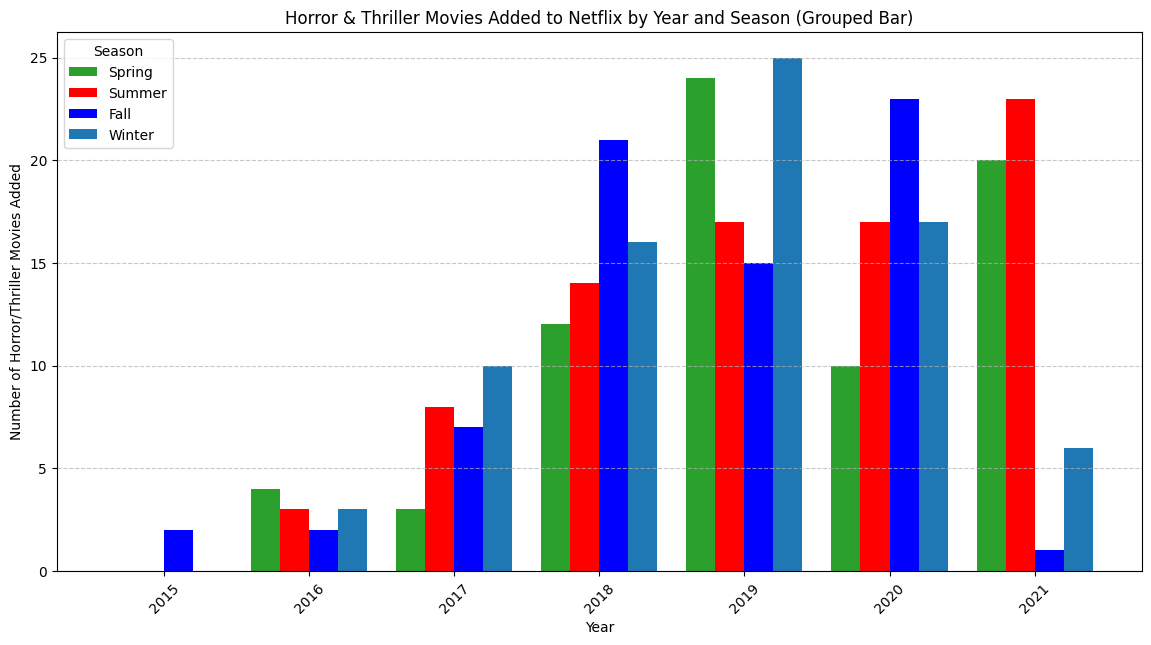

In [ ]:

# 연도별 & 계절별 영화 개수 계산

# 계절 컬럼 추가
horror_netflix_df['month_added'] = horror_netflix_df['date_added'].dt.month
horror_netflix_df['season'] = horror_netflix_df['month_added'].apply(get_season)

# 연도별 & 계절별 영화 개수 계산
year_season_counts = horror_netflix_df.groupby([horror_netflix_df['date_added'].dt.year, 'season']).size().unstack(fill_value=0)
year_season_counts = year_season_counts.loc[year_season_counts.index >= 2015]  # 2015년 이후 데이터만 포함


# 그룹형 막대 그래프 (Grouped Bar Chart)
plt.figure(figsize=(14, 7))
width = 0.2  # 막대 너비 설정
x = np.arange(len(year_season_counts.index))  # X축 좌표

# 각 계절별 막대 그래프 추가
plt.bar(x - width*1.5, year_season_counts['Spring'], width, label='Spring', color='C2')
plt.bar(x - width*0.5, year_season_counts['Summer'], width, label='Summer', color='red')
plt.bar(x + width*0.5, year_season_counts['Fall'], width, label='Fall', color='blue')
plt.bar(x + width*1.5, year_season_counts['Winter'], width, label='Winter', color='C0')

# X축 설정
plt.xlabel("Year")
plt.ylabel("Number of Horror/Thriller Movies Added")
plt.title("Horror Movies Added to Netflix by Year and Season (Grouped Bar)")

plt.xticks(ticks=x, labels=year_season_counts.index, rotation=45)
plt.legend(title="Season")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 시각화를 통해서 확인 된 내용
# 공포영화는 여름이 강세는 아닐 수도?
# 2015년 이후의 데이터로 진행할 예정입니다.

길이 : 5


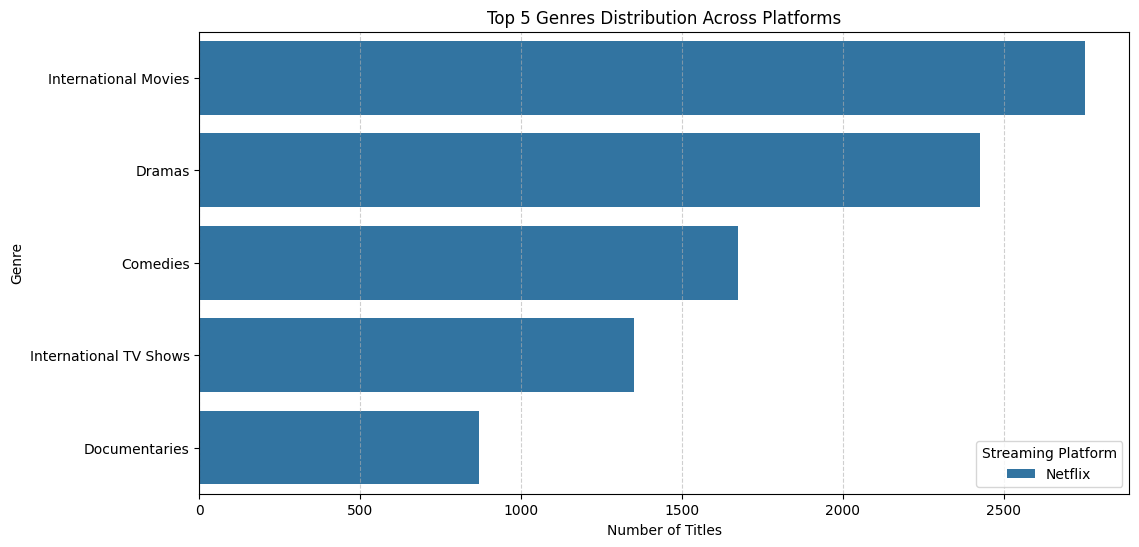

In [ ]:

# 호러와 비교할 장르들을 뽑아 냅니다.
# 장르 데이터 추출 및 정리 함수
# 모든 숫자는 의미가있습니다.
TOP_GENRE_COUNT = 5

def extract_genres(df):
    genres = df['listed_in'].dropna().str.split(', ')
    all_genres = [genre for sublist in genres for genre in sublist]
    return pd.Series(all_genres).value_counts()

# 각 플랫폼에서 상위 5개 장르 추출
netflix_top_genres = extract_genres(netflix_df).head(TOP_GENRE_COUNT)

print(f"길이 : {len(netflix_top_genres)}")

# 상위 장르 비교를 위한 데이터프레임 생성
top_genres_df = pd.DataFrame({
    "Netflix": netflix_top_genres
}).fillna(0)



# 데이터 정리
top_genres_long = top_genres_df.reset_index().melt(id_vars="index", var_name="Platform", value_name="Count")
top_genres_long.rename(columns={"index": "Genre"}, inplace=True)

# 시각화: 플랫폼별 장르 분포 (가로 막대 그래프)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_long, x="Count", y="Genre", hue="Platform", dodge=True)

plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 5 Genres Distribution Across Platforms")
plt.legend(title="Streaming Platform")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# 전처리 영역
# 날짜 변환 (date_added을 datetime 형식으로 변환)
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# season column 추가
netflix_df['season'] = netflix_df['date_added'].dt.month.apply(get_season)

# 주요 장르 리스트
# 아래 장르가 주요 장르인 이유
# 주요 장르를 기준에 의해 필터링 하는 코드가 추가되어야 할 것 같습니다.
# 대략 90건 이상인 데이터로 보임 - 확인 필요


print(type(netflix_top_genres))

# ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries', 'Action & Adventure', 'TV Dramas', 'Independent Movies', 'Children & Family Movies', 'Romantic Movies']
main_genres = netflix_top_genres.index.tolist()
print(main_genres)
genre_seasonal_counts = {}

# # 각 장르별 계절별 추가 개수 계산
# for genre in main_genres:
#     genre_df = netflix_df[netflix_df['listed_in'].str.contains(genre, case=False, na=False)].copy()
#     genre_seasonal_counts[genre] = genre_df['season'].value_counts().sort_index()



# # 시각화: 계절별 장르 비교
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# seasons = ['Winter', 'Spring', 'Summer', 'Fall']

# for ax, season in zip(axes.flatten(), seasons):
#     season_counts = {genre: genre_seasonal_counts[genre].get(season, 0) for genre in main_genres}
#     ax.bar(season_counts.keys(), season_counts.values(), color=sns.color_palette("tab10"))
#     ax.set_title(f"{season} - Genre Distribution")
#     ax.set_xlabel("Genre")
#     ax.set_ylabel("Number of Movies Added")
#     ax.tick_params(axis='x', rotation=45)
#     ax.grid(axis='y', linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.show()





# # 시각화: 계절별 장르 비교
# plt.figure(figsize=(10,6))
# for genre, counts in genre_seasonal_counts.items():
#     plt.plot(counts.index, counts.values, marker='o', linestyle='-', label=genre)

# plt.xlabel("Season")
# plt.ylabel("Number of Movies Added")
# plt.title("Seasonal Distribution of Main Genres on Netflix")
# plt.legend(title="Genre")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.show()

# # 계절별 주요 장르 영화 개수 출력
# genre_seasonal_counts


<class 'pandas.core.series.Series'>
['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']


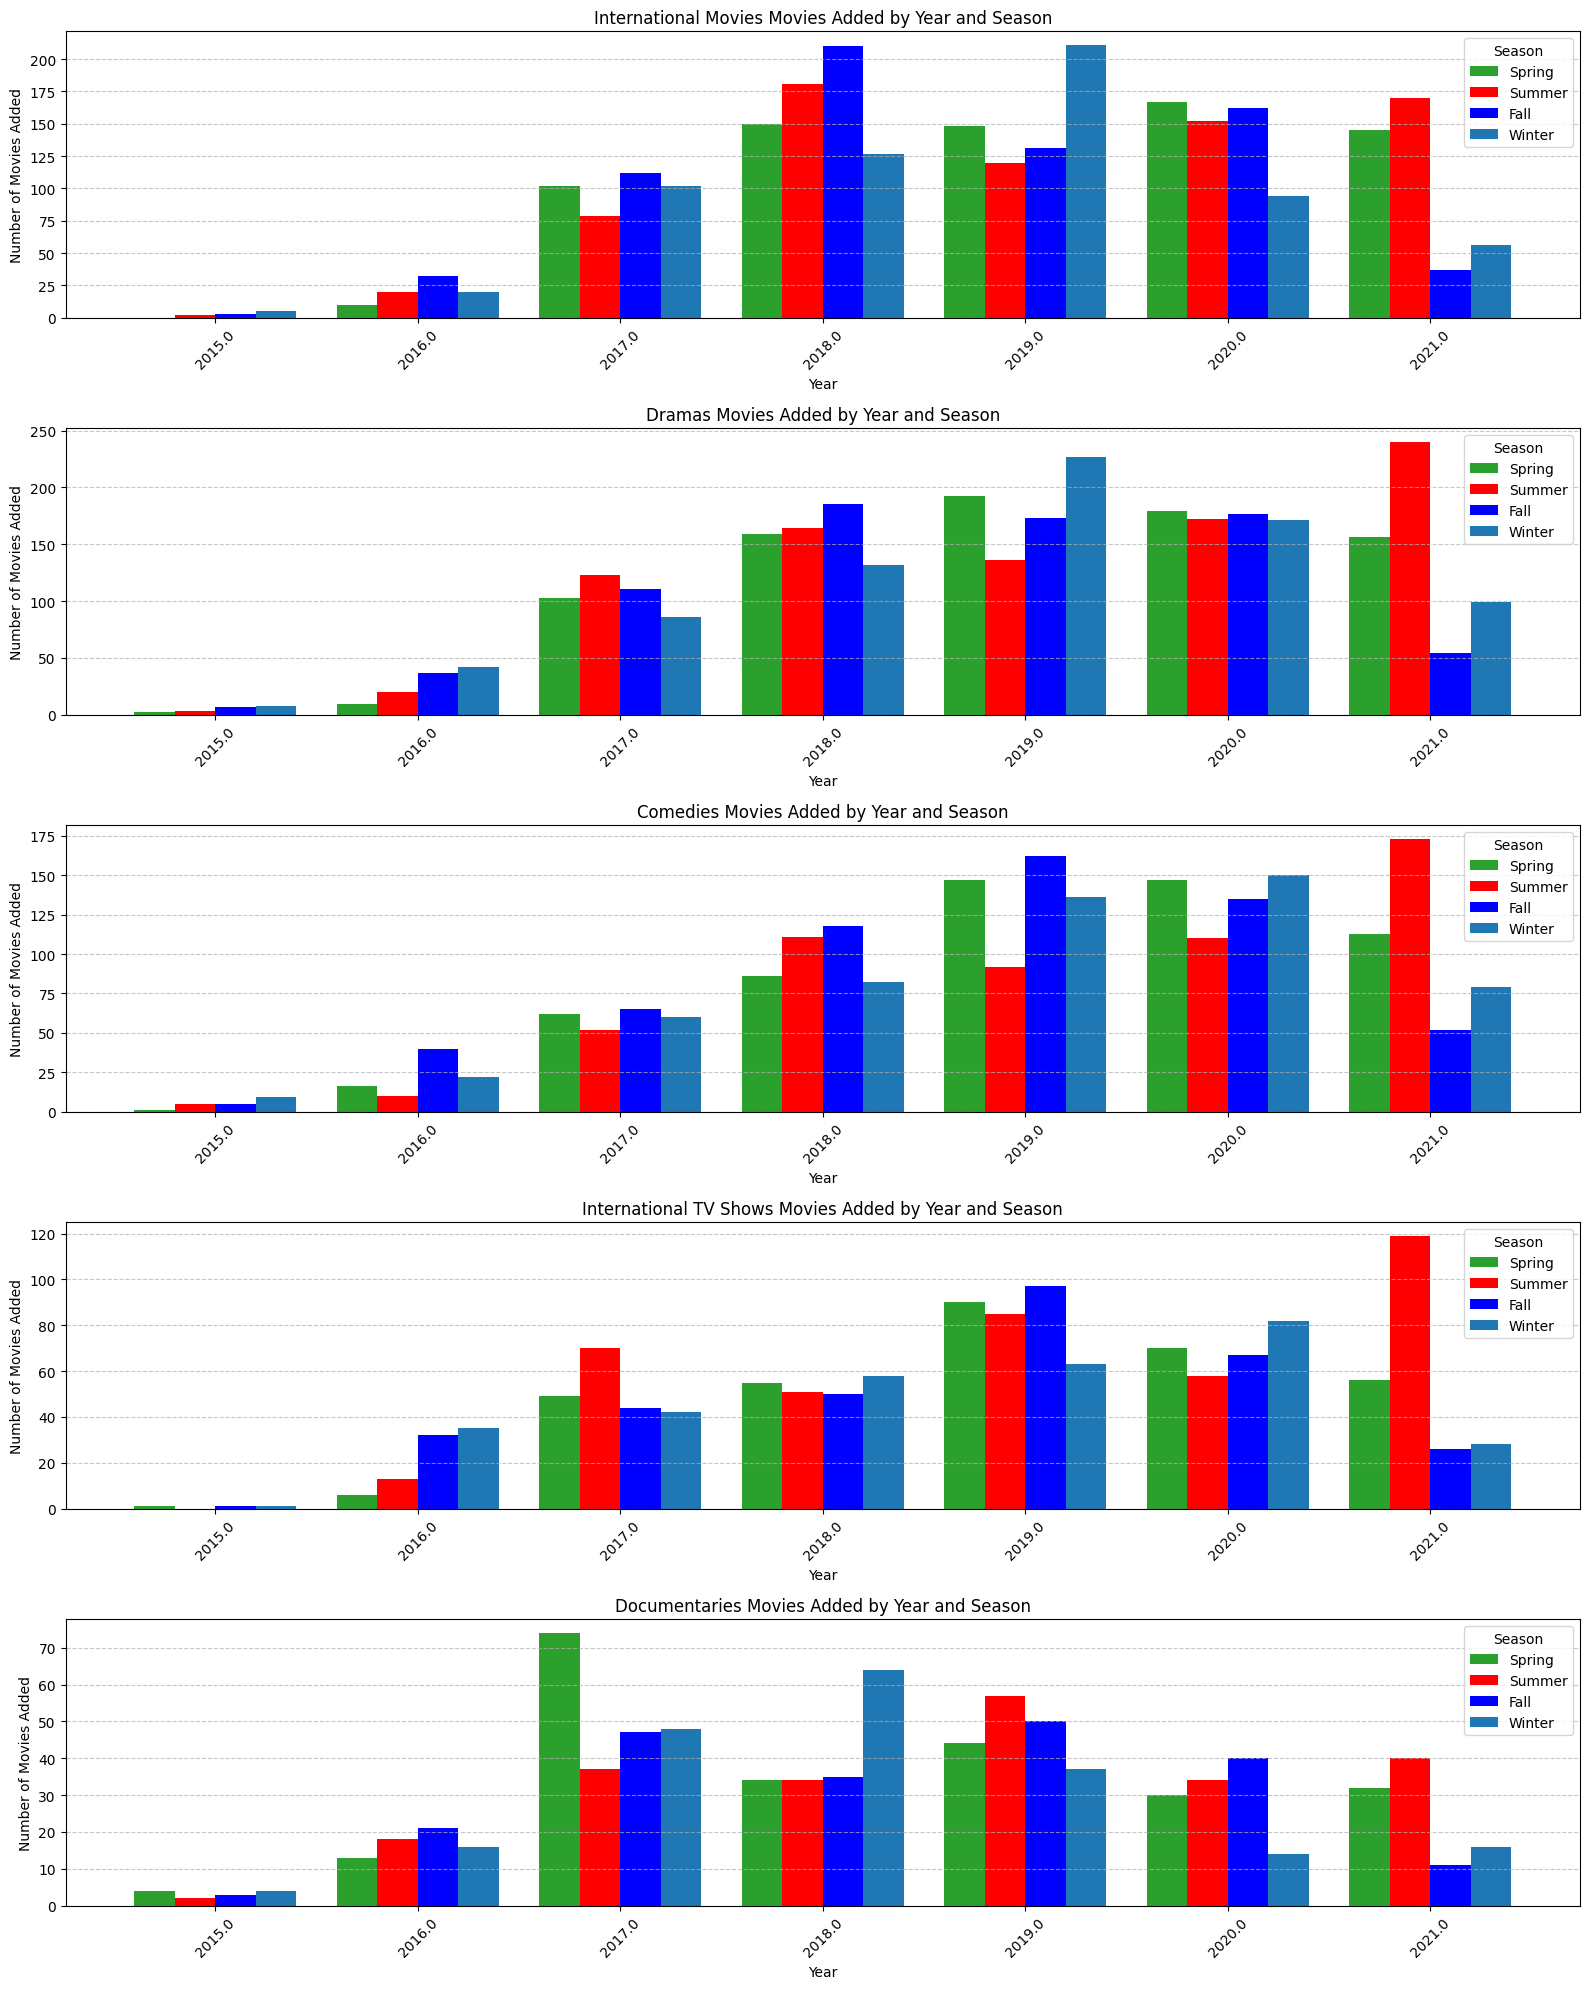

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['season'] = netflix_df['month_added'].apply(get_season)
netflix_df['year_added'] = netflix_df['date_added'].dt.year


# 시각화: 연도별 & 계절별 영화 개수 계산
fig, axes = plt.subplots(5, 1, figsize=(16, 20))
axes = axes.flatten()

for i, genre in enumerate(main_genres):
    genre_df = netflix_df[netflix_df['listed_in'].str.contains(genre, case=False, na=False)].copy()
    year_season_counts = genre_df.groupby([genre_df['year_added'], 'season']).size().unstack(fill_value=0)
    year_season_counts = year_season_counts.loc[year_season_counts.index >= 2015]

    ax = axes[i]
    width = 0.2
    x = np.arange(len(year_season_counts.index))

    ax.bar(x - width*1.5, year_season_counts['Spring'], width, label='Spring', color='C2')
    ax.bar(x - width*0.5, year_season_counts['Summer'], width, label='Summer', color='red')
    ax.bar(x + width*0.5, year_season_counts['Fall'], width, label='Fall', color='blue')
    ax.bar(x + width*1.5, year_season_counts['Winter'], width, label='Winter', color='C0')

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Movies Added")
    ax.set_title(f"{genre} Movies Added by Year and Season")
    ax.set_xticks(x)
    ax.set_xticklabels(year_season_counts.index, rotation=45)
    ax.legend(title="Season")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


주류 장르를 기준으로 특정 장르가 특정계절과 관련성이 있는지 확인
-> 결론 관련 없음

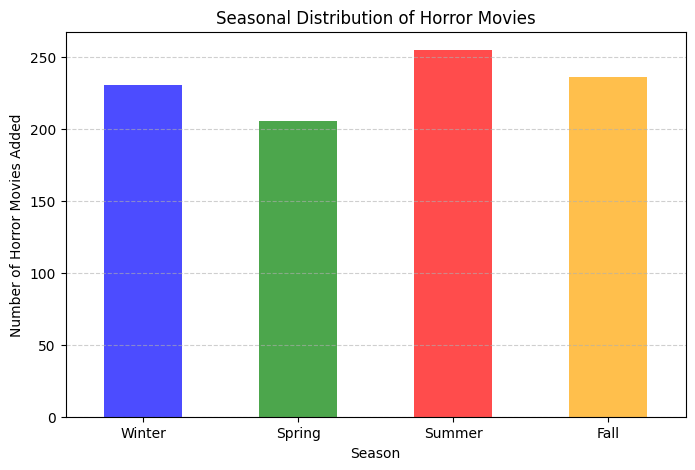

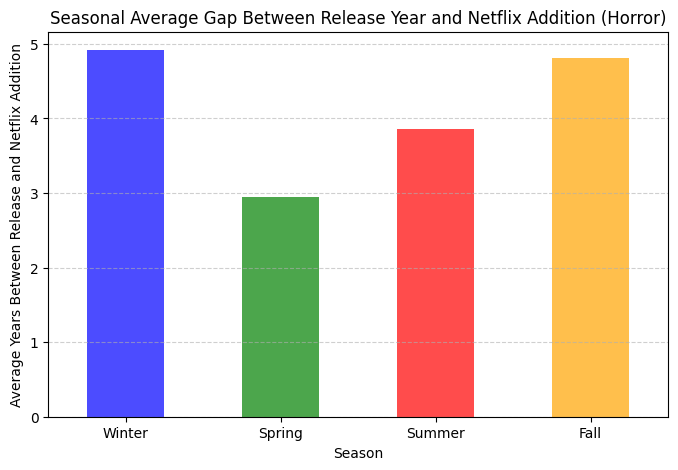

In [ ]:
# 'season' 컬럼 추가 (계절별 구분)
netflix_df['season'] = netflix_df['date_added'].dt.month.apply(get_season)

# 1 데이터 분석 AI: 여름 시즌 공포 & 스릴러 영화 추가 개수 확인
df_horror_thriller = netflix_df[netflix_df['listed_in'].str.contains("Horror|Thriller", case=False, na=False)].copy()
df_horror_thriller['season'] = df_horror_thriller['date_added'].dt.month.apply(get_season)

# 계절별 공포 & 스릴러 영화 개수 확인
season_counts = df_horror_thriller['season'].value_counts().reindex(["Winter", "Spring", "Summer", "Fall"], fill_value=0)

# 2 트렌드 분석 AI: 여름 시즌과 가을 시즌(할로윈) 비교
summer_count = season_counts["Summer"]
fall_count = season_counts["Fall"]

# 3 공포영화 추가까지 걸리는 시간 분석 (year_gap 계산)
df_horror_thriller['year_added'] = df_horror_thriller['date_added'].dt.year
df_horror_thriller['year_gap'] = df_horror_thriller['year_added'] - df_horror_thriller['release_year']

# 계절별 평균 개봉 후 추가까지 걸리는 시간 계산
seasonal_year_gap = df_horror_thriller.groupby('season')['year_gap'].mean().reindex(["Winter", "Spring", "Summer", "Fall"], fill_value=0)

# 4 시각화: 계절별 공포 & 스릴러 영화 개수 비교
plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'], alpha=0.7)
plt.xlabel("Season")
plt.ylabel("Number of Horror Movies Added")
plt.title("Seasonal Distribution of Horror Movies")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 5 시각화: 계절별 평균 개봉 후 추가까지 걸리는 시간 비교
plt.figure(figsize=(8, 5))
seasonal_year_gap.plot(kind='bar', color=['blue', 'green', 'red', 'orange'], alpha=0.7)
plt.xlabel("Season")
plt.ylabel("Average Years Between Release and Netflix Addition")
plt.title("Seasonal Average Gap Between Release Year and Netflix Addition (Horror)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


             title date_added  year_added
5    Midnight Mass 2021-09-24        2021
229   The Old Ways 2021-08-25        2021
236        Boomika 2021-08-23        2021
yearly_counts : year_added
2015     2
2016    12
2017    28
2018    63
2019    81
2020    67
2021    50
Name: count, dtype: int64
yearly_gapcounts : year_added
2015    0.000000
2016    0.416667
2017    0.607143
2018    0.904762
2019    0.987654
2020    1.044776
2021    1.060000
Name: year_gap, dtype: float64


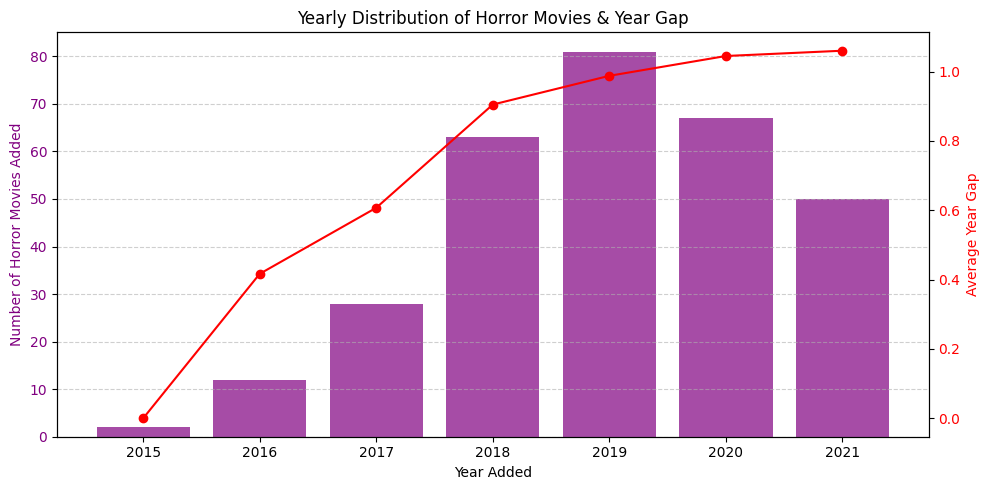

In [ ]:
# 계절별 공포영화의 최신수치(추가년도 - 개봉 년도) 확인

# 'year_added' 컬럼 추가 (date_added에서 연도 추출) - Horror 필터링 적용
horror_netflix_df['year_added'] = horror_netflix_df['date_added'].dt.year

# 개봉 연도 vs 추가 연도 차이 계산 (Horror | Thriller 기준)
horror_netflix_df['year_gap'] = horror_netflix_df['year_added'] - horror_netflix_df['release_year']

# 확인
print(horror_netflix_df[['title', 'date_added', 'year_added']].head(3))

# 연도별 공포 & 스릴러 영화 개수 확인
yearly_counts = horror_netflix_df['year_added'].value_counts().sort_index()
yearly_gapcounts = horror_netflix_df.groupby('year_added')['year_gap'].mean()

print(f"yearly_counts : {yearly_counts}")
print(f"yearly_gapcounts : {yearly_gapcounts}")

# 시각화 (연도별 공포 & 스릴러 영화 추가 개수 및 평균 year_gap)
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(yearly_counts.index, yearly_counts, color='purple', alpha=0.7, label='Movies Added')
ax1.set_xlabel("Year Added")
ax1.set_ylabel("Number of Horror Movies Added", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title("Yearly Distribution of Horror Movies & Year Gap")
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# 두 번째 y축 추가
twin_ax = ax1.twinx()
twin_ax.plot(yearly_gapcounts.index, yearly_gapcounts, color='red', marker='o', linestyle='-', label='Avg Year Gap')
twin_ax.set_ylabel("Average Year Gap", color='red')
twin_ax.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()
